# K-Means

Importamos lo necesario

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

Creamos un toy dataset de 3 clusters

In [2]:
X, y = make_blobs(n_samples=500, centers=3, random_state=100)

Añadimos ruido

In [3]:
X = X + np.random.normal(0, 1, X.shape)

Definimos nuestro KMeans con valor de k=3

In [4]:
k = 3
kmeans_best = KMeans(n_clusters=k, random_state=100)
y_kmeans = kmeans_best.fit_predict(X)

Graficamos el clustering con el k número de clusters

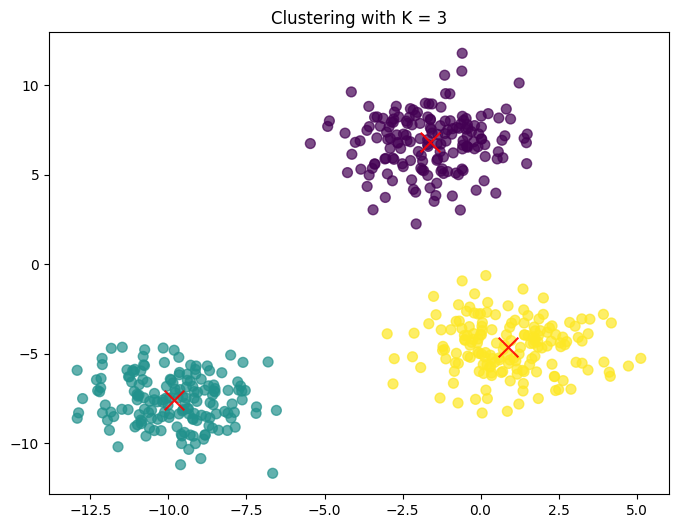

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
centers = kmeans_best.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='x')
plt.title(f'Clustering with K = {k}')
plt.show()

### A) Encontrar el mejor valor de K con Elbow Method

Calculamos la inertia.

Inertia en KMeans es una medida de la suma de las distancias cuadradas entre cada punto de un cluster y su centroide más cercano.

In [6]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [7]:
inertia

[31856.5528949791,
 12380.453409561855,
 2121.9475367570035,
 1903.1529896541592,
 1638.345510298476,
 1471.3929954019736,
 1215.9741696371225,
 1068.2307925824857,
 895.8377431424601,
 850.3949947161659]

Graficamos el Elbow Method


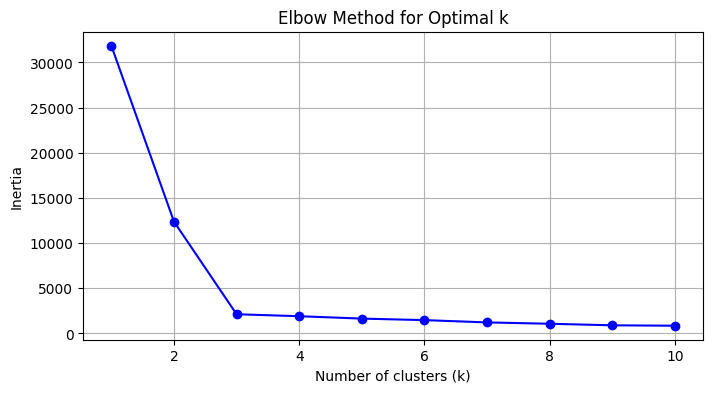

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

### B) Encontar el mejor K con Silhouette Score

Calculamos el coeficiente de silueta para diferentes valores de k

In [9]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=100)
    y_kmeans = kmeans.fit_predict(X)

    if k > 1:  # El Silhouette Score no se define para k = 1
        silhouette_scores.append(silhouette_score(X, y_kmeans))
    else:
        silhouette_scores.append(0)  # Ponemos 0 para k=1 por conveniencia


In [10]:
silhouette_scores

[0,
 np.float64(0.6004399597235935),
 np.float64(0.7650850913111316),
 np.float64(0.6120354615695933),
 np.float64(0.4640644804999246),
 np.float64(0.47020388949897385),
 np.float64(0.3387329665589803),
 np.float64(0.34777431627369954),
 np.float64(0.36203747610437426),
 np.float64(0.34664369079214025)]

Graficamos el Silhoutte Coefficient

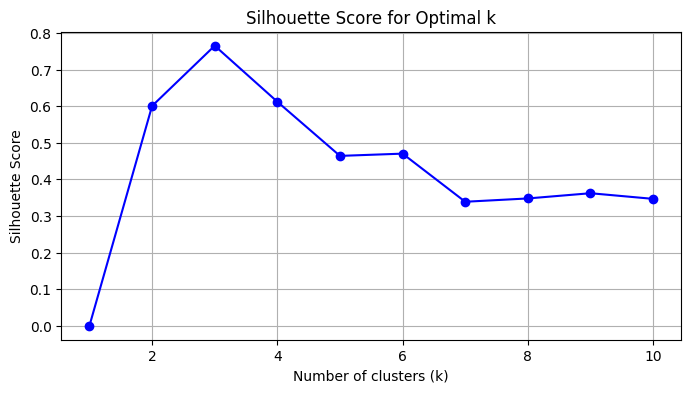

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

Final

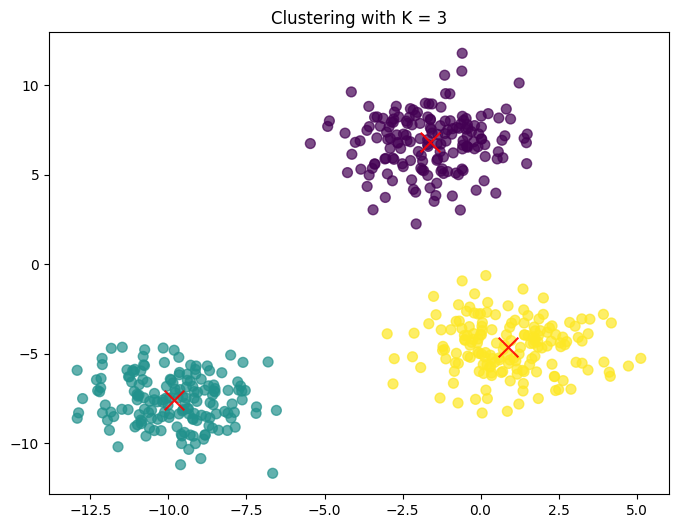

In [12]:
# Elegimos el mejor número de clusters
best_k = K_range[np.argmax(silhouette_scores)]

kmeans_best = KMeans(n_clusters=best_k, random_state=100)
y_kmeans = kmeans_best.fit_predict(X)

# Graficamos el clustering con el mejor número de clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
centers = kmeans_best.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='x')
plt.title(f'Clustering with K = {best_k}')
plt.show()
